In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#df=pd.read_csv('sell.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [7]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1/1/2021,2815.0
1,1/2/2021,2672.0
2,1/3/2021,2755.0
3,1/4/2021,2721.0
4,1/5/2021,2946.0


In [8]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
101,4/12/2021,5312.0
102,4/13/2021,4298.0
103,4/14/2021,1413.0
104,4/15/2021,5877.0
105,NaN,NaN


In [10]:
df.drop(105,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
100,4/11/2021,4618.0
101,4/12/2021,5312.0
102,4/13/2021,4298.0
103,4/14/2021,1413.0
104,4/15/2021,5877.0


In [12]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales
0,2021-01-01,2815.0
1,2021-01-02,2672.0
2,2021-01-03,2755.0
3,2021-01-04,2721.0
4,2021-01-05,2946.0


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales
Month,
2021-01-01,2815.0
2021-01-02,2672.0
2021-01-03,2755.0
2021-01-04,2721.0
2021-01-05,2946.0


In [16]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

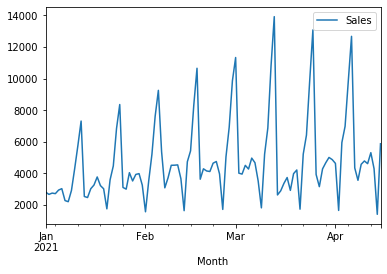

In [17]:
df.plot()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Sales'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [22]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [23]:
df['Sales'].shift(1)

Month
2021-01-01       NaN
2021-01-02    2815.0
2021-01-03    2672.0
2021-01-04    2755.0
2021-01-05    2721.0
               ...  
2021-04-11    4788.0
2021-04-12    4618.0
2021-04-13    5312.0
2021-04-14    4298.0
2021-04-15    1413.0
Name: Sales, Length: 105, dtype: float64

In [24]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [25]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
2021-01-01,2815.0,NaN,NaN
2021-01-02,2672.0,-143.0,NaN
2021-01-03,2755.0,83.0,NaN
2021-01-04,2721.0,-34.0,NaN
2021-01-05,2946.0,225.0,NaN
2021-01-06,3036.0,90.0,NaN
2021-01-07,2282.0,-754.0,NaN
2021-01-08,2212.0,-70.0,NaN
2021-01-09,2922.0,710.0,NaN


In [26]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


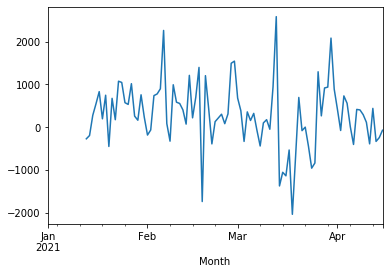

In [27]:
df['Seasonal First Difference'].plot()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 


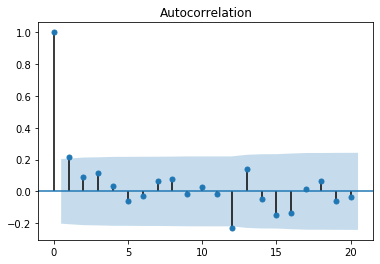

In [30]:
acf= plot_acf(df['Seasonal First Difference'].dropna())

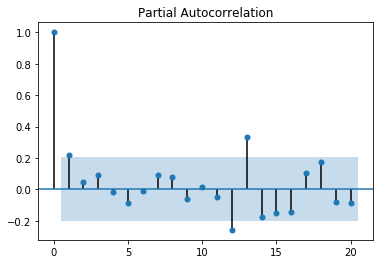

In [31]:
pacf= plot_pacf(df['Seasonal First Difference'].dropna())

In [32]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 21 Jul 2022   AIC                           1910.251
Time:                        12:17:33   BIC                           1920.829
Sample:                    01-02-2021   HQIC                          1914.536
                         - 04-15-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7842     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

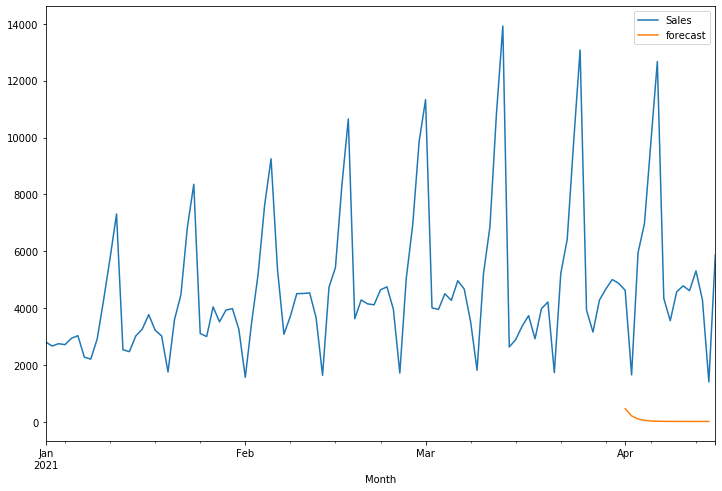

In [37]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

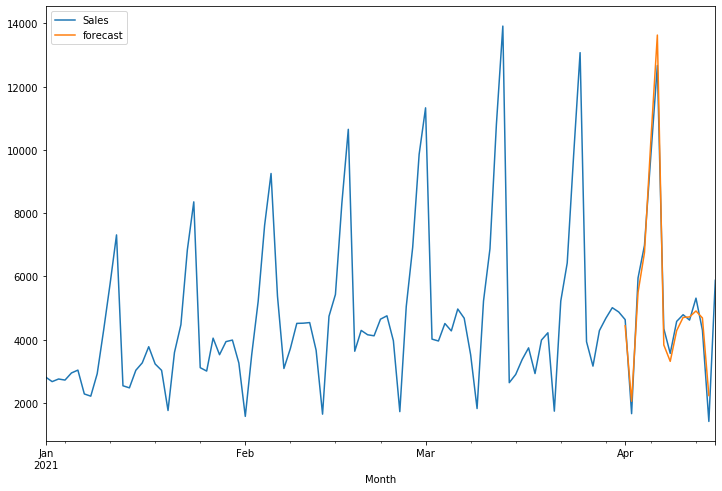

In [40]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [41]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [42]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [43]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2022-11-15,NaN,NaN,NaN,NaN
2022-12-15,NaN,NaN,NaN,NaN
2023-01-15,NaN,NaN,NaN,NaN
2023-02-15,NaN,NaN,NaN,NaN
2023-03-15,NaN,NaN,NaN,NaN


In [44]:
future_df=pd.concat([df,future_datest_df])

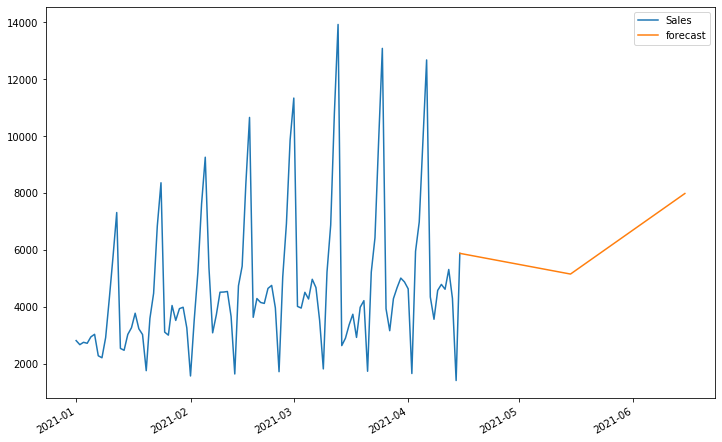

In [45]:
future_df['forecast'] = results.predict(start = 104, end = 180, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [46]:
train=df.iloc[:-30]
test= df.iloc[-30:]
print(train.shape,test.shape)

(75, 4) (30, 4)


In [47]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results2=model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   75
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -500.661
Date:                            Thu, 21 Jul 2022   AIC                           1011.322
Time:                                    12:17:41   BIC                           1021.957
Sample:                                01-01-2021   HQIC                          1015.497
                                     - 03-16-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1703      0.112      1.517      0.129      -0.050       0.390
ma.L1         -0.9505      0.093    -10.223      0.000      -1.133      -0.768
ar.S.L12      -0.5987      0.729     -0.822      0.411      -2.027       0.829
ma.S.L12       0.4939      0.750      0.659      0.510      -0.975       1.963
sigma2       5.37e+05   8.94e+04      6.007      0.000    3.62e+05    7.12e+05
===================================================================================
Ljung-Box (Q):                       51.77   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.10   Prob(JB):                         0.05
Heteroskedasticity (H):               2.69   Skew:                             0.05
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
start= len(train)
end=len(train)+len(test)-1
pred = results.predict(start=start,end=end,typ='levels')

#pred.index=datasetDiffshifting.index[start:end+1]
print(pred)

2021-03-17     4111.359388
2021-03-18     4955.026164
2021-03-19     4232.527257
2021-03-20     3498.374214
2021-03-21     2075.981794
2021-03-22     5257.752630
2021-03-23     7057.199187
2021-03-24    10584.751562
2021-03-25    13180.400256
2021-03-26     2900.095238
2021-03-27     3421.467957
2021-03-28     3693.234428
2021-03-29     4136.816797
2021-03-30     3706.627747
2021-03-31     4758.666191
2021-04-01     4437.325416
2021-04-02     2115.244866
2021-04-03     5370.894423
2021-04-04     6895.883990
2021-04-05    10411.658401
2021-04-06    13491.549889
2021-04-07     3515.009557
2021-04-08     3449.465931
2021-04-09     4353.953090
2021-04-10     4792.191146
2021-04-11     4751.313235
2021-04-12     4881.451468
2021-04-13     4977.891907
2021-04-14     1761.633125
2021-04-15     5878.712046
Freq: D, dtype: float64


In [49]:
model12=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model12=model.fit()
df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
2021-04-11,4618.0,-170.0,-392.0,4717.511639
2021-04-12,5312.0,694.0,438.0,4906.404408
2021-04-13,4298.0,-1014.0,-335.0,4685.437172
2021-04-14,1413.0,-2885.0,-246.0,2232.408859
2021-04-15,5877.0,4464.0,-74.0,NaN


In [50]:
pred2=model12.predict(start=len(df),end=len(df)+90,typ ='level').rename('Preducation')
print(pred2)

2021-04-16     7672.668362
2021-04-17    11514.504443
2021-04-18    14454.189440
2021-04-19     3550.294357
2021-04-20     3678.603983
                  ...     
2021-07-11    16171.200367
2021-07-12     5199.558141
2021-07-13     5351.779676
2021-07-14     5858.284208
2021-07-15     6670.582122
Freq: D, Name: Preducation, Length: 91, dtype: float64


In [51]:
type(pred)

pandas.core.series.Series

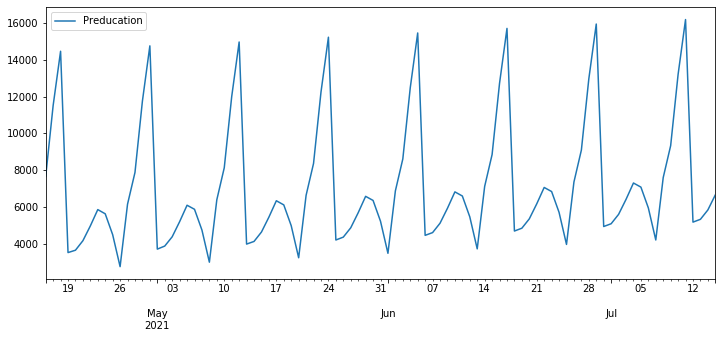

In [52]:
pred2.plot(figsize= (12,5),legend= True)

In [53]:
test['Sales'].mean()

5255.1

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [55]:
rmse = sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)

646.0328730824867


In [56]:
pred2.to_csv(r'C:\Users\User\OneDrive\Desktop\last Project BI\my_data.csv', index=True)